In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from matplotlib.ticker import ScalarFormatter

In [54]:
# new module loading 3 layers plus key cities and provinces
df = pd.read_csv('data/2019-nCov stats - ChinaHubeiWuhan&Cities.csv',skiprows=[0,1])\
    .set_index('Date').drop('Time', axis=1)\
    .dropna(axis=1, how='all')\
    .dropna(axis=0, how='all')\
    .dropna(subset=['confirmed'])
# df = df.fillna(axis=0, method='bfill')
df.columns = 'Cc,Cr,Cd,Hc,Hr,Hd,Hcd,Wc,Wr,Wd,Wcd,Beijing,Shanghai,Chongqing,Guangzhou,Shenzhen,Changsha,Nanchang,Zhengzhou,Heifei,Henan,Anhui,Jiangxi,Hunan,Shanxi'.split(',')
# select only the 3 layers
df = df.iloc[:,:10].drop('Hcd',axis=1)
for i in df.columns:
    df[i] = pd.to_numeric(df[i])
df.tail(3)

,Cc,Cr,Cd,Hc,Hr,Hd,Wc,Wr,Wd
Date,,,,,,,,,
2020/2/27,78824.0,36117.0,2788.0,65914.0,26403.0,2682.0,48137.0,15826.0,2132.0
2020/2/28,79251.0,39002.0,2835.0,66337.0,28895.0,2727.0,48557.0,17552.0,2169.0
2020/2/29,79824.0,41625.0,2870.0,66907.0,31187.0,2761.0,49122.0,19227.0,2195.0


# Three Layers Trend

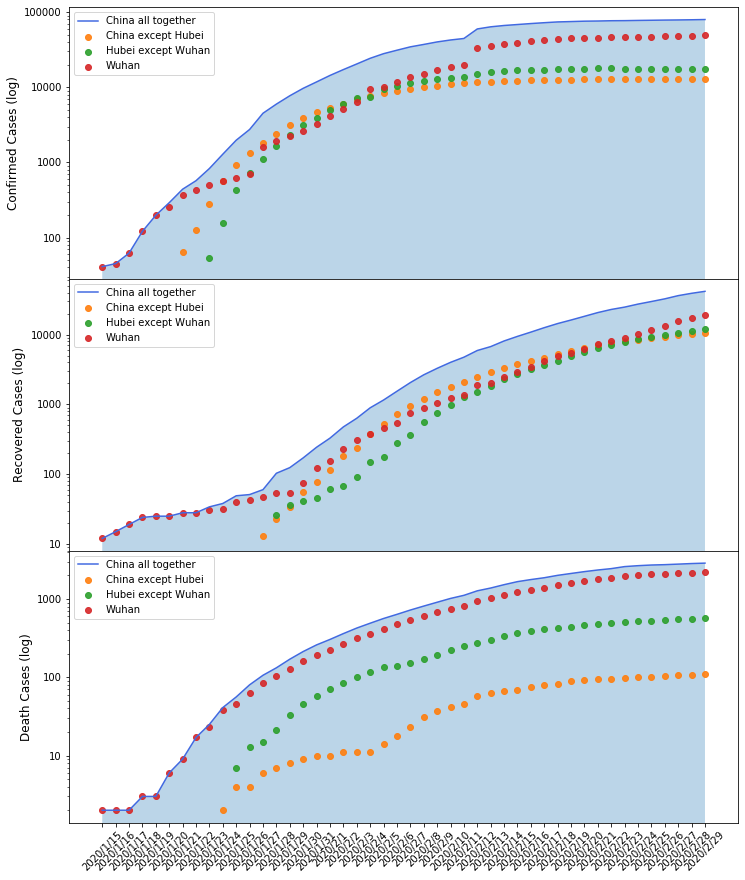

In [45]:
focus = df.iloc[5:,:10].copy()

fig, ax=plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,15))
fig.subplots_adjust(hspace=0)

label_0 = 'China all together'
label_1 = 'China except Hubei'
label_2 = 'Hubei except Wuhan'
label_3 = 'Wuhan'
a_alpha=0.3
s_alpha=0.9
s_size=30

ax[0].plot(focus.index, focus['Cc'], label=label_0, c='royalblue')
ax[0].fill_between(focus.index, focus['Cc'], alpha=a_alpha)
ax[0].scatter(focus.index, focus['Cc']-focus['Hc'], label=label_1, alpha=s_alpha)
ax[0].scatter(focus.index, focus['Hc']-focus['Wc'], label=label_2, alpha=s_alpha)
ax[0].scatter(focus.index, focus['Wc'], label=label_3, alpha=s_alpha)
# ax[0].scatter(focus.index, focus['Hcd'], label='Clinical Diagonesd', alpha=s_alpha)
ax[0].tick_params(labelrotation=90)
ax[0].legend()
ax[0].set_yscale('log')
ax[0].yaxis.set_major_formatter(ScalarFormatter())
ax[0].set_ylabel('Confirmed Cases (log)', size=12)
ax[0].tick_params(labelrotation=0)

ax[1].plot(focus.index, focus['Cr'], label=label_0, c='royalblue')
ax[1].fill_between(focus.index, focus['Cr'], alpha=a_alpha)
ax[1].scatter(focus.index, focus['Cr']-focus['Hr'], label=label_1, alpha=s_alpha)
ax[1].scatter(focus.index, focus['Hr']-focus['Wr'], label=label_2, alpha=s_alpha)
ax[1].scatter(focus.index, focus['Wr'], label=label_3, alpha=s_alpha)
ax[1].legend()
ax[1].set_yscale('log')
ax[1].yaxis.set_major_formatter(ScalarFormatter())
ax[1].set_ylabel('Recovered Cases (log)', size=12)

ax[2].plot(focus.index, focus['Cd'], label=label_0, c='royalblue')
ax[2].fill_between(focus.index, focus['Cd'], alpha=a_alpha)
ax[2].scatter(focus.index, focus['Cd']-focus['Hd'], label=label_1, alpha=s_alpha)
ax[2].scatter(focus.index, focus['Hd']-focus['Wd'], label=label_2, alpha=s_alpha)
ax[2].scatter(focus.index, focus['Wd'], label=label_3, alpha=s_alpha)
ax[2].legend()
ax[2].set_yscale('log')
ax[2].yaxis.set_major_formatter(ScalarFormatter())
ax[2].set_ylabel('Death Cases (log)', size=12)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.show()

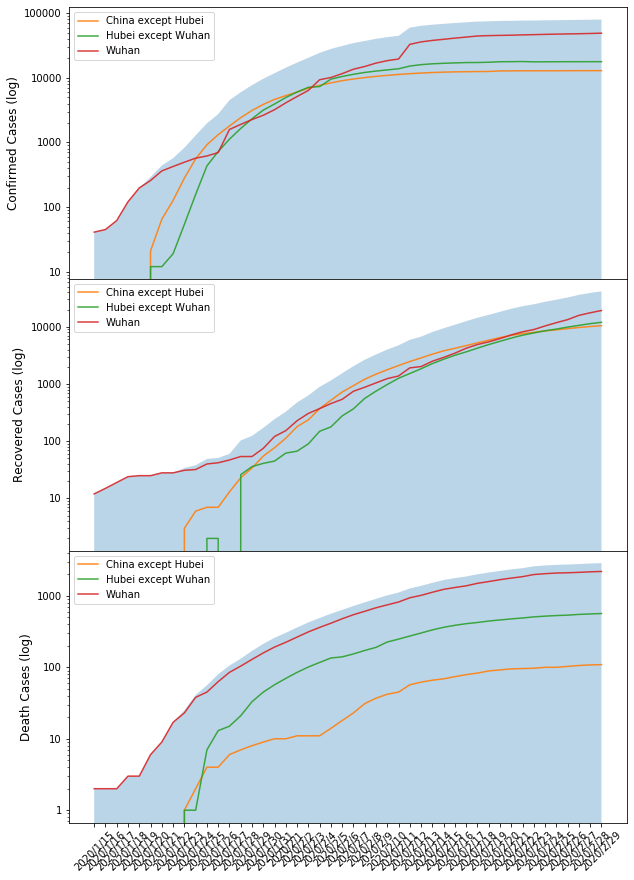

In [46]:
focus = df.iloc[5:,:].copy()

fig, ax=plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,15))
fig.subplots_adjust(hspace=0)

label_0 = 'China all together'
label_1 = 'China except Hubei'
label_2 = 'Hubei except Wuhan'
label_3 = 'Wuhan'
a_alpha=0.3
s_alpha=0.9
s_size=30

ax[0].plot(focus.index, focus['Cc'], label='', alpha=0)
ax[0].fill_between(focus.index, focus['Cc'], alpha=a_alpha)
ax[0].plot(focus.index, focus['Cc']-focus['Hc'], label=label_1, alpha=s_alpha)
ax[0].plot(focus.index, focus['Hc']-focus['Wc'], label=label_2, alpha=s_alpha)
ax[0].plot(focus.index, focus['Wc'], label=label_3, alpha=s_alpha)
ax[0].tick_params(labelrotation=90)
ax[0].legend()
ax[0].set_yscale('log')
ax[0].yaxis.set_major_formatter(ScalarFormatter())
ax[0].set_ylabel('Confirmed Cases (log)', size=12)
ax[0].tick_params(labelrotation=0)

ax[1].plot(focus.index, focus['Cr'], label='', alpha=0)
ax[1].fill_between(focus.index, focus['Cr'], alpha=a_alpha)
ax[1].plot(focus.index, focus['Cr']-focus['Hr'], label=label_1, alpha=s_alpha)
ax[1].plot(focus.index, focus['Hr']-focus['Wr'], label=label_2, alpha=s_alpha)
ax[1].plot(focus.index, focus['Wr'], label=label_3, alpha=s_alpha)
ax[1].legend()
ax[1].set_yscale('log')
ax[1].yaxis.set_major_formatter(ScalarFormatter())
ax[1].set_ylabel('Recovered Cases (log)', size=12)

ax[2].plot(focus.index, focus['Cd'], label='', alpha=0)
ax[2].fill_between(focus.index, focus['Cd'], alpha=a_alpha)
ax[2].plot(focus.index, focus['Cd']-focus['Hd'], label=label_1, alpha=s_alpha)
ax[2].plot(focus.index, focus['Hd']-focus['Wd'], label=label_2, alpha=s_alpha)
ax[2].plot(focus.index, focus['Wd'], label=label_3, alpha=s_alpha)
ax[2].legend()
ax[2].set_yscale('log')
ax[2].yaxis.set_major_formatter(ScalarFormatter())
ax[2].set_ylabel('Death Cases (log)', size=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.show()

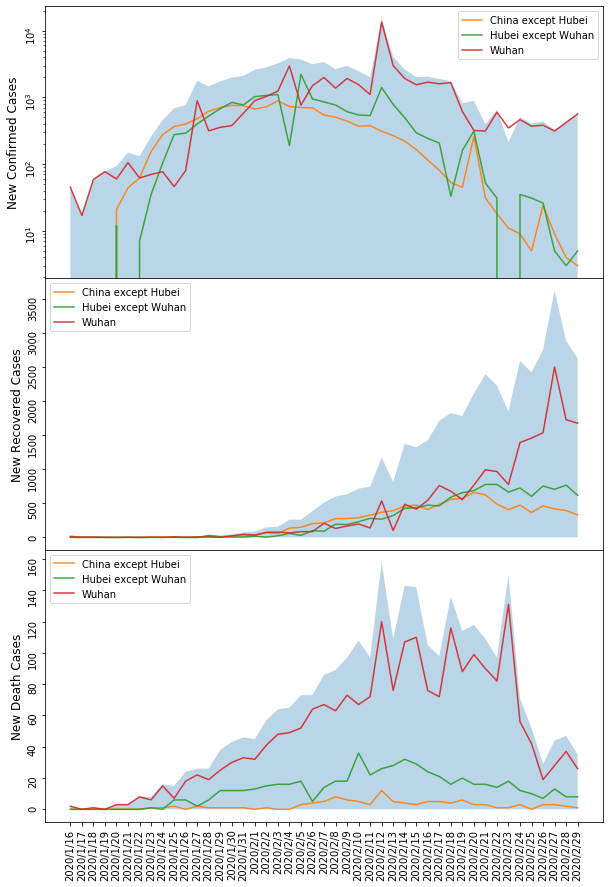

In [56]:
focus = df.iloc[6:,:10].copy()
for c in list(focus):
    focus['n'+c] = np.append(focus[c].values[0], np.diff(focus[c]))

fig, ax=plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,15))
fig.subplots_adjust(hspace=0)

label_0 = 'China all together'
label_1 = 'China except Hubei'
label_2 = 'Hubei except Wuhan'
label_3 = 'Wuhan'
a_alpha=0.3
s_alpha=0.9
s_size=30

ax[0].plot(focus.index, focus['nCc'], label='', alpha=0)
ax[0].fill_between(focus.index, focus['nCc'], alpha=a_alpha)
ax[0].plot(focus.index, focus['nCc']-focus['nHc'], label=label_1, alpha=s_alpha)
ax[0].plot(focus.index, focus['nHc']-focus['nWc'], label=label_2, alpha=s_alpha)
ax[0].plot(focus.index, focus['nWc'], label=label_3, alpha=s_alpha)
ax[0].set_ylabel('New Confirmed Cases', size=12)
ax[0].set_yscale('log')

ax[1].plot(focus.index, focus['nCr'], label='', alpha=0)
ax[1].fill_between(focus.index, focus['nCr'], alpha=a_alpha)
ax[1].plot(focus.index, focus['nCr']-focus['nHr'], label=label_1, alpha=s_alpha)
ax[1].plot(focus.index, focus['nHr']-focus['nWr'], label=label_2, alpha=s_alpha)
ax[1].plot(focus.index, focus['nWr'], label=label_3, alpha=s_alpha)
ax[1].set_ylabel('New Recovered Cases', size=12)

ax[2].plot(focus.index, focus['nCd'], label='', alpha=0)
ax[2].fill_between(focus.index, focus['nCd'], alpha=a_alpha)
ax[2].plot(focus.index, focus['nCd']-focus['nHd'], label=label_1, alpha=s_alpha)
ax[2].plot(focus.index, focus['nHd']-focus['nWd'], label=label_2, alpha=s_alpha)
ax[2].plot(focus.index, focus['nWd'], label=label_3, alpha=s_alpha)
ax[2].set_ylabel('New Death Cases', size=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
#     ax.set_yscale('log')
#     ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.legend()
    ax.tick_params(labelrotation=90)
#     ax.tick_params(labelrotation=0)
    
plt.show()

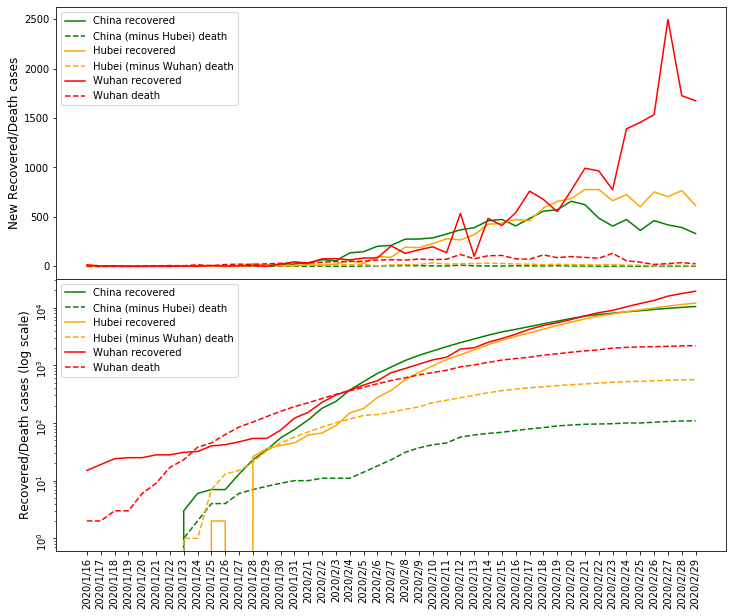

In [57]:
# focus = df.iloc[5:,:].copy()
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(12,10), sharex=True)
fig.subplots_adjust(hspace=0)

ax[0].plot(focus.index, (focus['nCr']-focus['nHr']), label='China recovered', c='green')
ax[0].plot(focus.index, (focus['nCd']-focus['nHd']), label='China (minus Hubei) death', c='green', ls='--')
ax[0].plot(focus.index, (focus['nHr']-focus['nWr']), label='Hubei recovered', c='orange')
ax[0].plot(focus.index, (focus['nHd']-focus['nWd']), label='Hubei (minus Wuhan) death', c='orange', ls='--')
ax[0].plot(focus.index, (focus['nWr']), label='Wuhan recovered', c='red')
ax[0].plot(focus.index, (focus['nWd']), label='Wuhan death', c='red', ls='--')

ax[0].set_ylabel('New Recovered/Death cases', size=12)
# ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(focus.index, (focus['Cr']-focus['Hr']), label='China recovered', c='green')
ax[1].plot(focus.index, (focus['Cd']-focus['Hd']), label='China (minus Hubei) death', c='green', ls='--')
ax[1].plot(focus.index, (focus['Hr']-focus['Wr']), label='Hubei recovered', c='orange')
ax[1].plot(focus.index, (focus['Hd']-focus['Wd']), label='Hubei (minus Wuhan) death', c='orange', ls='--')
ax[1].plot(focus.index, (focus['Wr']), label='Wuhan recovered', c='red')
ax[1].plot(focus.index, (focus['Wd']), label='Wuhan death', c='red', ls='--')

ax[1].set_ylabel('Recovered/Death cases (log scale)', size=12)
ax[1].set_yscale('log')
ax[1].tick_params(labelrotation=90)
ax[1].legend()

---

# Hubei New Category

In [24]:
focus = df.iloc[5:,:10].copy()
focus

,Cc,Cr,Cd,Hc,Hr,Hd,Hcd,Wc,Wr,Wd
Date,,,,,,,,,,
2020/1/15,41.0,12.0,2.0,41.0,12.0,2.0,NaN,41,12,2.0
2020/1/16,45.0,15.0,2.0,45.0,15.0,2.0,NaN,45,15,2.0
2020/1/17,62.0,19.0,2.0,62.0,19.0,2.0,NaN,62,19,2.0
2020/1/18,121.0,24.0,3.0,121.0,24.0,3.0,NaN,121,24,3.0
2020/1/19,198.0,25.0,3.0,198.0,25.0,3.0,NaN,198,25,3.0
2020/1/20,291.0,25.0,6.0,270.0,25.0,6.0,NaN,258,25,6.0
2020/1/21,440.0,28.0,9.0,375.0,28.0,9.0,NaN,363,28,9.0
2020/1/22,571.0,28.0,17.0,444.0,28.0,17.0,NaN,425,28,17.0
2020/1/23,830.0,34.0,25.0,549.0,31.0,24.0,NaN,495,31,23.0


# Other cities

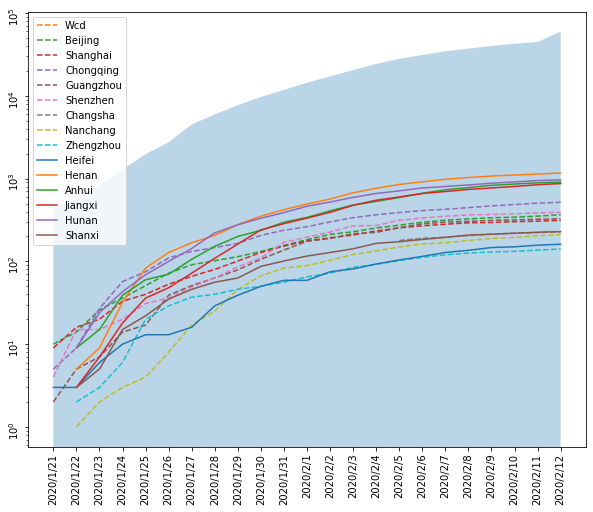

In [9]:
focus = df.iloc[11:,:].copy()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax.plot(focus.index, focus['Cc'], label='', alpha=0)
ax.fill_between(focus.index, focus['Cc'], alpha=a_alpha)

for target in focus.columns[10:19]:
    ax.plot(focus.index, focus[target], label=target,ls='--')
for target in focus.columns[19:]:
    ax.plot(focus.index, focus[target], label=target,)

ax.set_yscale('log')
ax.tick_params(labelrotation=90)
ax.legend()

Text(0, 0.5, 'Ratio of Cumlulative \nConfirmed Cases \nfor 5 Cities to Hubei')

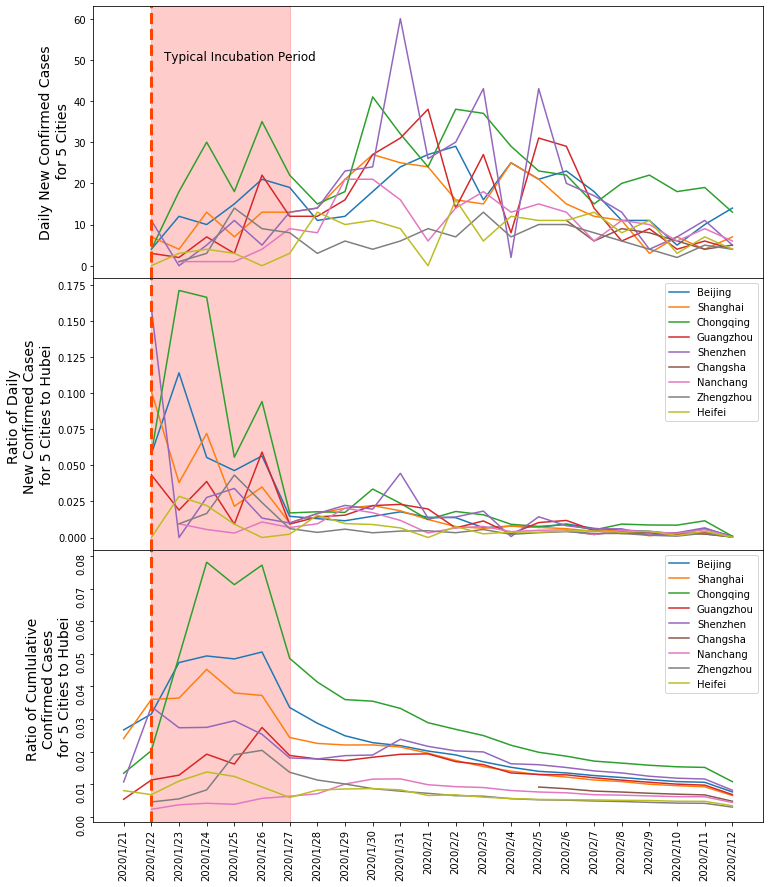

In [11]:
focus = df.iloc[11:,:].copy()

fig, ax=plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,15))
fig.subplots_adjust(hspace=0)

for target in focus.columns[11:20]:
    ax[0].plot(np.insert(np.diff(focus[target]),0, np.nan), label=target)
    ax[1].plot(np.insert(np.diff(focus[target]) / np.diff(focus['Hc']),0, np.nan), label=target)
    ax[2].plot(focus[target] / focus['Hc'], label=target)

ax[2].tick_params(labelrotation=90)
for i in ax:
    if i != ax[0]:
        i.legend()
    i.axvline(1, ymin=0, ymax=1, c='orangered',ls='--',lw=3)
    i.axvspan(1, 6, ymin=0, ymax=1, alpha=0.2, color='red')

ax[0].text(1.45,50, 'Typical Incubation Period', size=12)
ax[0].set_ylabel('Daily New Confirmed Cases\n for 5 Cities', size=14)
ax[1].set_ylabel('Ratio of Daily \nNew Confirmed Cases \nfor 5 Cities to Hubei', size=14)
ax[2].set_ylabel('Ratio of Cumlulative \nConfirmed Cases \nfor 5 Cities to Hubei', size=14)

# plt.savefig('figures/5 cities_r.png', dpi=600)

Text(0, 0.5, 'Ratio of Cumlulative \nConfirmed Cases \nfor 5 Adjacent Provinces to Hubei')

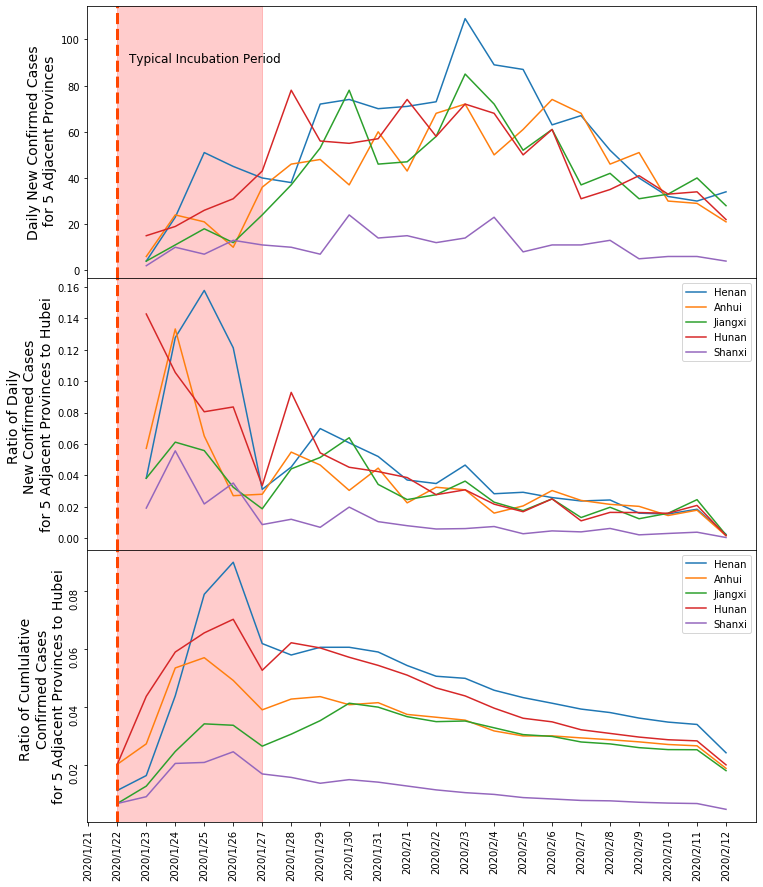

In [12]:
focus = df.iloc[11:,:].copy()

fig, ax=plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,15))
fig.subplots_adjust(hspace=0)

for target in focus.columns[20:]:
    ax[0].plot(np.insert(np.diff(focus[target]),0, np.nan), label=target)
    ax[1].plot(np.insert(np.diff(focus[target]) / np.diff(focus['Hc']),0, np.nan), label=target)
    ax[2].plot(focus[target] / focus['Hc'], label=target)

ax[2].tick_params(labelrotation=90)
for i in ax:
    if i != ax[0]:
        i.legend()
    i.axvline(1, ymin=0, ymax=1, c='orangered',ls='--',lw=3)
    i.axvspan(1, 6, ymin=0, ymax=1, alpha=0.2, color='red')

ax[0].text(1.4,90, 'Typical Incubation Period', size=12)
ax[0].set_ylabel('Daily New Confirmed Cases\n for 5 Adjacent Provinces', size=14)
ax[1].set_ylabel('Ratio of Daily \nNew Confirmed Cases \nfor 5 Adjacent Provinces to Hubei', size=14)
ax[2].set_ylabel('Ratio of Cumlulative \nConfirmed Cases \nfor 5 Adjacent Provinces to Hubei', size=14)

# plt.savefig('figures/5 cities_r.png', dpi=600)

---